In [112]:
import os

In [113]:
import warnings

warnings.filterwarnings('ignore')

In [114]:
# os.chdir('C:\\Users\\HP\\OneDrive\\Desktop\\Identification of high-reliability regions of machine learning predictions in materials\\Datasets')

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
import numpy as np
import math

In [117]:
df_train=pd.read_csv('ci3c01684_si_002.txt')

In [118]:
df_test=pd.read_csv('ci3c01684_si_003.txt')

In [119]:
df=pd.concat([df_train,df_test])

In [120]:
df

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,Ef,Eg
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,90.0001,0.0054,1.4011
596,597,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,90.0004,0.2348,0.8068
597,598,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,119.9857,0.1086,0.9004
598,599,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,90.0007,0.2582,2.2720


In [121]:
print('Total data: ', df.shape)

Total data:  (3000, 14)


In [122]:
df.isnull().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
Ef                            0
Eg                            0
dtype: int64

In [123]:
df.dtypes

id                              int64
spacegroup                      int64
number_of_total_atoms         float64
percent_atom_al               float64
percent_atom_ga               float64
percent_atom_in               float64
lattice_vector_1_ang          float64
lattice_vector_2_ang          float64
lattice_vector_3_ang          float64
lattice_angle_alpha_degree    float64
lattice_angle_beta_degree     float64
lattice_angle_gamma_degree    float64
Ef                            float64
Eg                            float64
dtype: object

In [124]:
df.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,Ef,Eg
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1020.500000,141.131333,61.690000,0.382552,0.309537,0.307909,10.043603,7.085938,12.563114,90.227556,92.416367,95.096382,0.187161,2.071749
std,720.952963,84.889702,22.670433,0.267096,0.236100,0.265731,5.658571,1.905129,5.448554,1.277620,5.321079,25.517470,0.104587,1.016390
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.724200,0.000000,0.000100
25%,375.750000,33.000000,40.000000,0.156200,0.093800,0.062500,6.137700,5.832350,9.300800,89.999700,90.001000,89.998775,0.104650,1.264975
50%,900.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.531650,6.385800,10.121300,90.001600,90.003600,90.000400,0.181050,1.910150
75%,1650.250000,206.000000,80.000000,0.562500,0.468800,0.468800,10.308925,9.098000,14.369800,90.006200,90.014500,119.998500,0.255000,2.756600
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.054000,0.767600,5.839700


In [125]:
df.duplicated().sum()

0

In [126]:
sg_counts=df['spacegroup'].value_counts()

In [127]:
Natoms_counts=df['number_of_total_atoms'].value_counts()

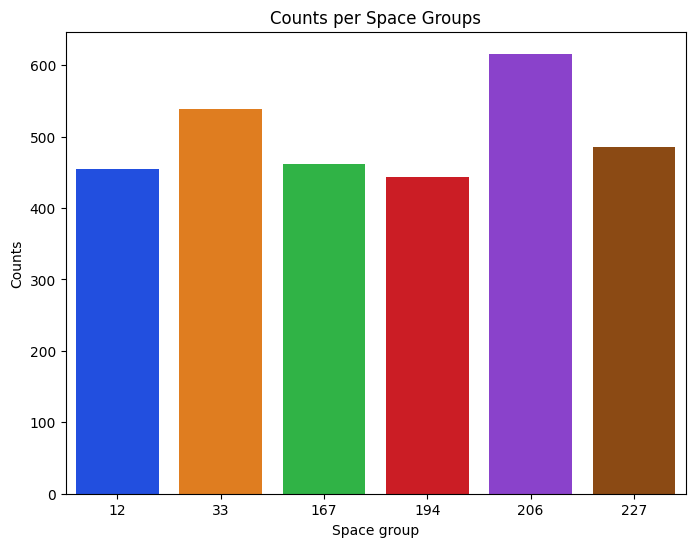

In [128]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=sg_counts.index,y=sg_counts.values,palette='bright')
plt.title('Counts per Space Groups')
plt.xlabel('Space group')
plt.ylabel('Counts')
plt.show()

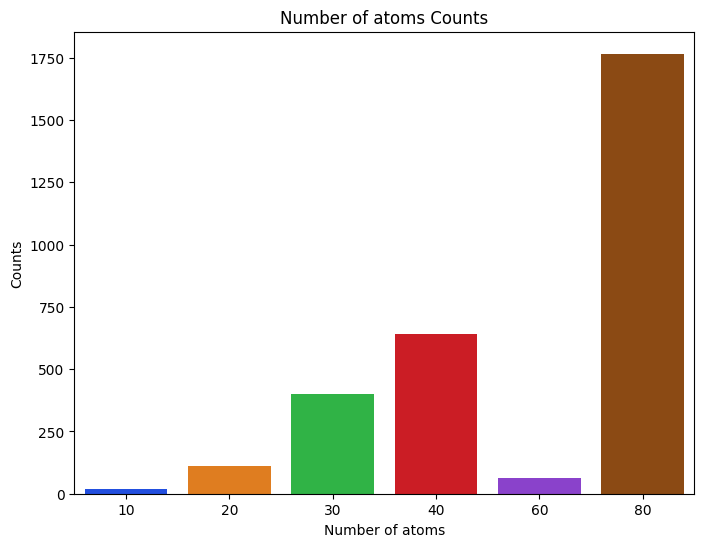

In [129]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=Natoms_counts.index.astype('int'),y=Natoms_counts.values,palette='bright')
plt.title('Number of atoms Counts')
plt.xlabel('Number of atoms')
plt.ylabel('Counts')
plt.show()

In [130]:
df['Al_atoms']=df['number_of_total_atoms']*df['percent_atom_al']
df['Ga_atoms']=df['number_of_total_atoms']*df['percent_atom_ga']
df['In_atoms']=df['number_of_total_atoms']*df['percent_atom_in']

In [131]:
df

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,Ef,Eg,Al_atoms,Ga_atoms,In_atoms
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387,50.0,30.000,0.000
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210,50.0,30.000,0.000
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438,32.5,7.500,0.000
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492,22.5,0.000,7.500
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793,0.0,50.000,30.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,90.0001,0.0054,1.4011,0.0,47.504,32.496
596,597,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,90.0004,0.2348,0.8068,5.0,0.000,35.000
597,598,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,119.9857,0.1086,0.9004,0.0,20.000,60.000
598,599,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,90.0007,0.2582,2.2720,25.0,0.000,15.000


In [132]:
df['sg']=df['spacegroup'].astype('object')

In [133]:
df=pd.get_dummies(df,dtype=int)

In [134]:
df.drop('id',axis=1,inplace =True)

In [135]:
df

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,Eg,Al_atoms,Ga_atoms,In_atoms,sg_12,sg_33,sg_167,sg_194,sg_206,sg_227
0,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,...,3.4387,50.0,30.000,0.000,0,1,0,0,0,0
1,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,...,2.9210,50.0,30.000,0.000,0,0,0,1,0,0
2,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,...,2.7438,32.5,7.500,0.000,0,0,0,0,0,1
3,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,...,3.3492,22.5,0.000,7.500,0,0,1,0,0,0
4,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,...,1.3793,0.0,50.000,30.000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,...,1.4011,0.0,47.504,32.496,1,0,0,0,0,0
596,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,...,0.8068,5.0,0.000,35.000,0,1,0,0,0,0
597,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,...,0.9004,0.0,20.000,60.000,0,0,0,1,0,0
598,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,...,2.2720,25.0,0.000,15.000,0,1,0,0,0,0


<Axes: xlabel='number_of_total_atoms', ylabel='Ef'>

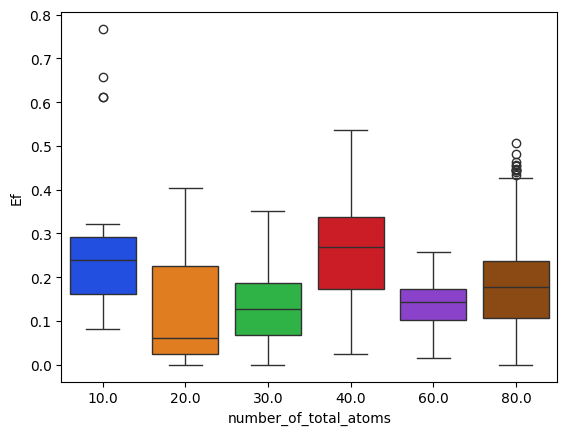

In [136]:
sns.boxplot(data=df,x='number_of_total_atoms',y='Ef',palette='bright')

<Axes: xlabel='number_of_total_atoms', ylabel='Eg'>

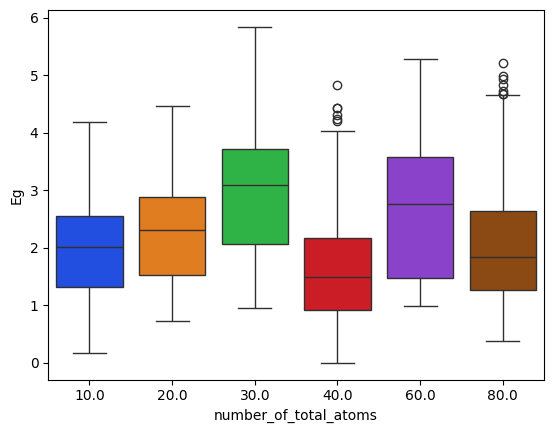

In [137]:
sns.boxplot(data=df,x='number_of_total_atoms',y='Eg',palette='bright')

<Axes: xlabel='spacegroup', ylabel='Eg'>

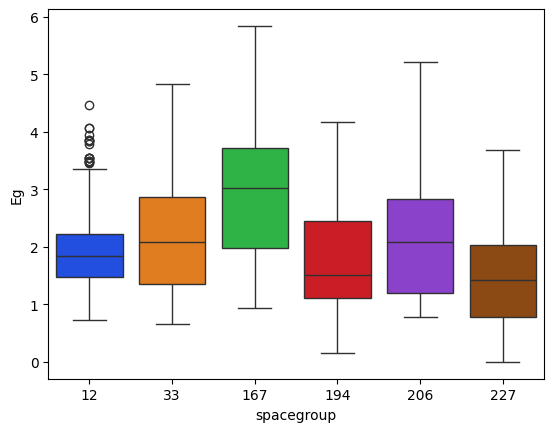

In [138]:
sns.boxplot(data=df,x='spacegroup',y='Eg',palette='bright')

<Axes: xlabel='spacegroup', ylabel='Ef'>

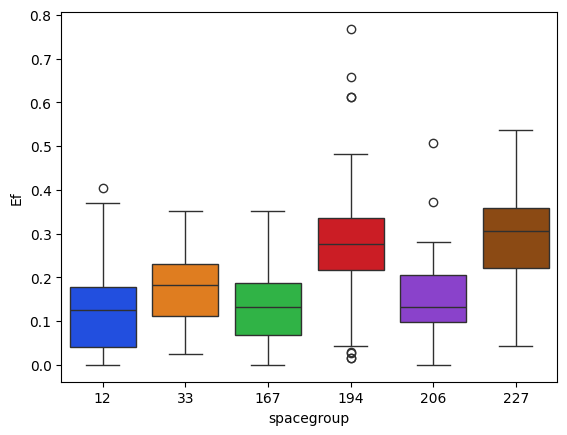

In [139]:
sns.boxplot(data=df,x='spacegroup',y='Ef',palette='bright')

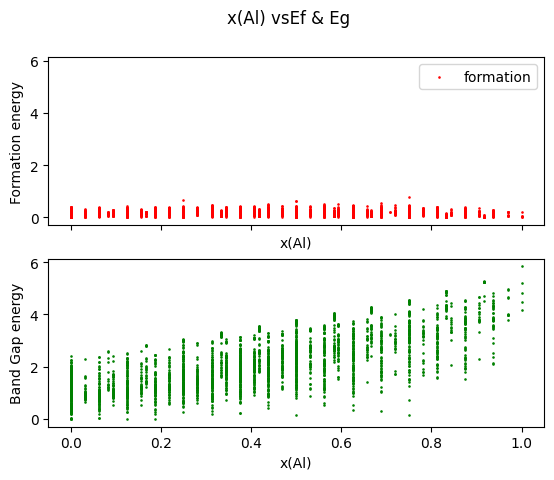

In [140]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['percent_atom_al'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['percent_atom_al'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('x(Al) vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('x(Al)')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('x(Al)')

plt.show()

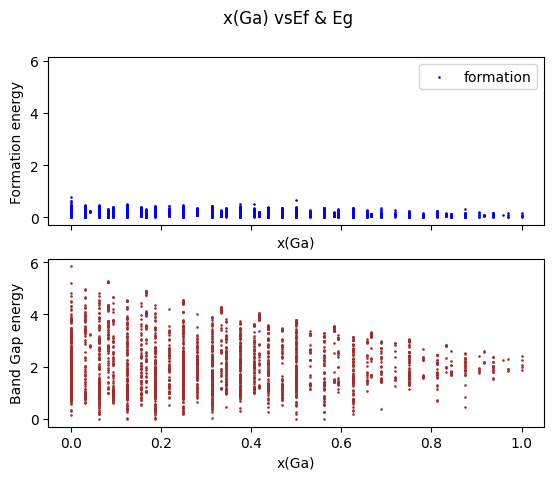

In [141]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['percent_atom_ga'].values, df['Ef'].values,
              color='blue', s=3, label='formation',marker='.')
ax[1].scatter(df['percent_atom_ga'].values,df['Eg'].values,
              color='brown', s=3, label='bandgap',marker='.')
fig.suptitle('x(Ga) vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('x(Ga)')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('x(Ga)')

plt.show()

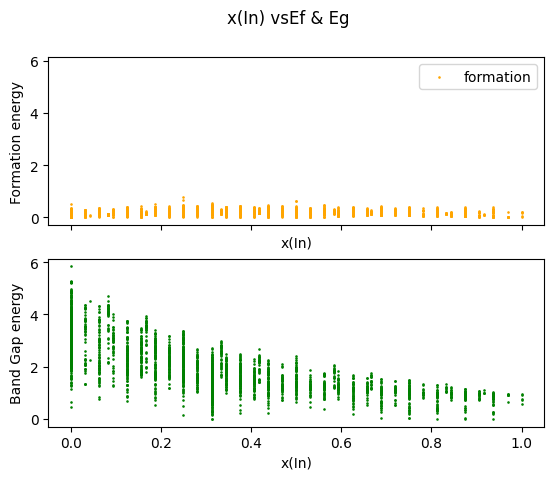

In [142]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['percent_atom_in'].values, df['Ef'].values,
              color='orange', s=3, label='formation',marker='.')
ax[1].scatter(df['percent_atom_in'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('x(In) vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('x(In)')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('x(In)')

plt.show()

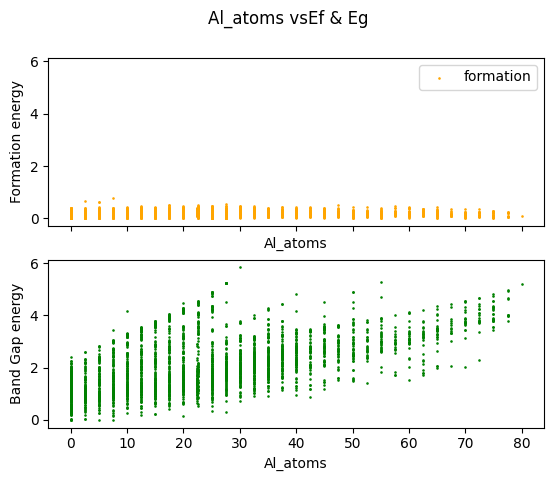

In [143]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['Al_atoms'].values, df['Ef'].values,
              color='orange', s=3, label='formation',marker='.')
ax[1].scatter(df['Al_atoms'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Al_atoms vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('Al_atoms')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('Al_atoms')

plt.show()

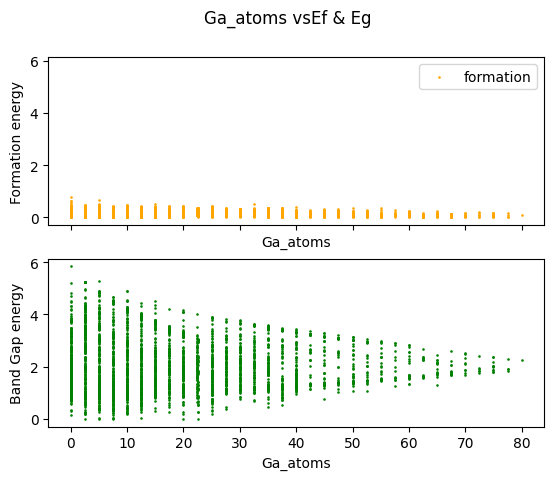

In [144]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['Ga_atoms'].values, df['Ef'].values,
              color='orange', s=3, label='formation',marker='.')
ax[1].scatter(df['Ga_atoms'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Ga_atoms vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('Ga_atoms')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('Ga_atoms')

plt.show()

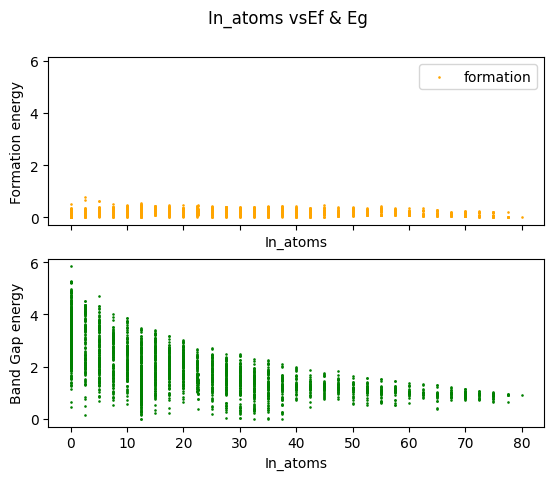

In [145]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['In_atoms'].values, df['Ef'].values,
              color='orange', s=3, label='formation',marker='.')
ax[1].scatter(df['In_atoms'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('In_atoms vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Formation energy')
ax[0].set_xlabel('In_atoms')
ax[1].set_ylabel('Band Gap energy')
ax[1].set_xlabel('In_atoms')

plt.show()

Text(0.5, 1.0, 'Mean-Space groups')

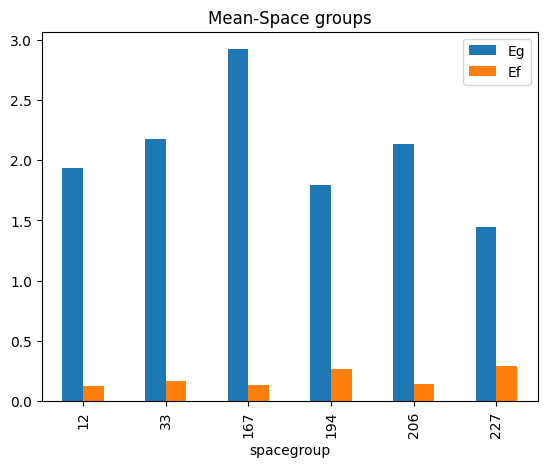

In [146]:
df.groupby('spacegroup')[['Eg','Ef']].mean().plot(kind='bar')
plt.title('Mean-Space groups')

In [147]:
def one_to_two(x):
    a = x['lattice_vector_1_ang']
    b = x['lattice_vector_2_ang']
    c = x['lattice_angle_gamma_degree']
    return np.sqrt( a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))

In [148]:
df.apply(one_to_two,axis=1)

0      13.121664
1      10.710964
2       5.659565
3       8.666390
4      11.537088
         ...    
595    25.625649
596    11.003704
597    12.015150
598    10.270355
599    13.428655
Length: 3000, dtype: float64

In [149]:
def one_to_three(x):
    a = x['lattice_vector_1_ang']
    b = x['lattice_vector_3_ang']
    c = x['lattice_angle_beta_degree']
    return np.sqrt( a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))

In [150]:
df.apply(one_to_three,axis=1)

0      13.538172
1      24.424314
2      17.186719
3      14.428228
4      25.467980
         ...    
595    27.111026
596    11.547172
597    26.005152
598    10.818635
599    13.429382
Length: 3000, dtype: float64

In [151]:
def two_to_three(x):
    a = x['lattice_vector_2_ang']
    b = x['lattice_vector_3_ang']
    c = x['lattice_angle_alpha_degree']
    return np.sqrt(a**2 + b**2 - 2*a*b*math.cos(math.radians(c)))

In [152]:
df.apply(two_to_three,axis=1)

0      12.544256
1      24.426414
2      15.154787
3      14.426266
4      25.467411
         ...    
595     8.973285
596    13.863342
597    26.007260
598    12.991638
599    13.429146
Length: 3000, dtype: float64

In [153]:
cont=pd.crosstab(df['spacegroup'], df['number_of_total_atoms'])
# contingency table

In [154]:
cont

number_of_total_atoms,10.0,20.0,30.0,40.0,60.0,80.0
spacegroup,,,,,,
12,0,111,0,0,0,344
33,0,0,0,156,0,383
167,0,0,399,0,62,0
194,20,0,0,0,0,423
206,0,0,0,0,0,616
227,0,0,0,486,0,0


<Figure size 640x480 with 0 Axes>

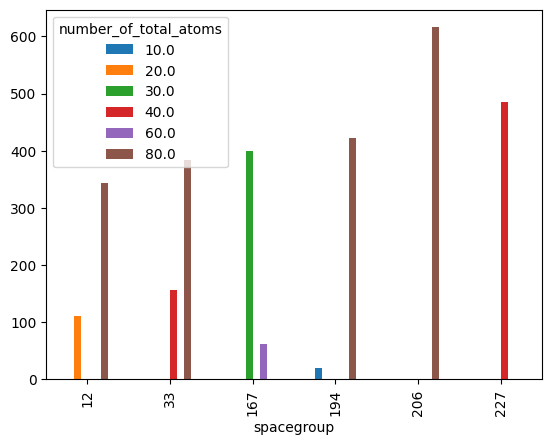

<Figure size 640x480 with 0 Axes>

In [155]:
#Number of atoms = 80 and the counts over spacegroups
cont.plot(kind='bar')
plt.figure()

<Axes: xlabel='lattice_vector_1_ang', ylabel='lattice_vector_2_ang'>

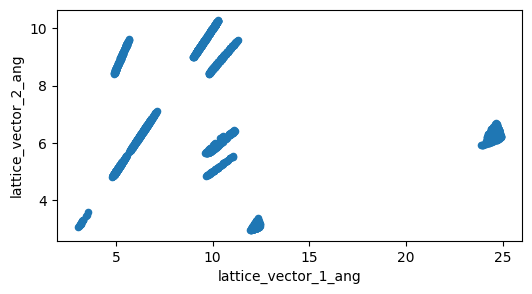

In [156]:
df.plot(kind="scatter", x="lattice_vector_1_ang", y="lattice_vector_2_ang",figsize=(6,3))

<Axes: xlabel='lattice_vector_1_ang', ylabel='lattice_vector_3_ang'>

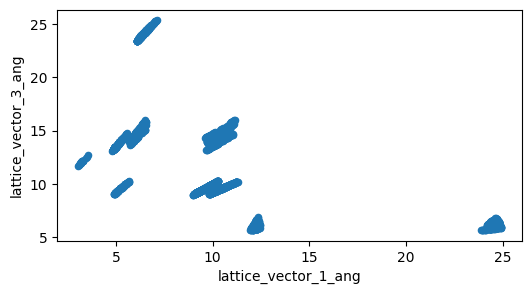

In [157]:
df.plot(kind="scatter", x="lattice_vector_1_ang", y="lattice_vector_3_ang",figsize=(6,3))

<Axes: xlabel='lattice_vector_2_ang', ylabel='lattice_vector_3_ang'>

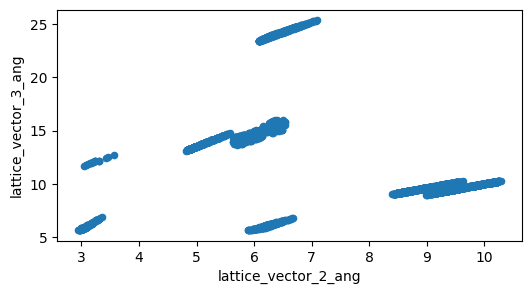

In [158]:
df.plot(kind="scatter", x="lattice_vector_2_ang", y="lattice_vector_3_ang",figsize=(6,3))

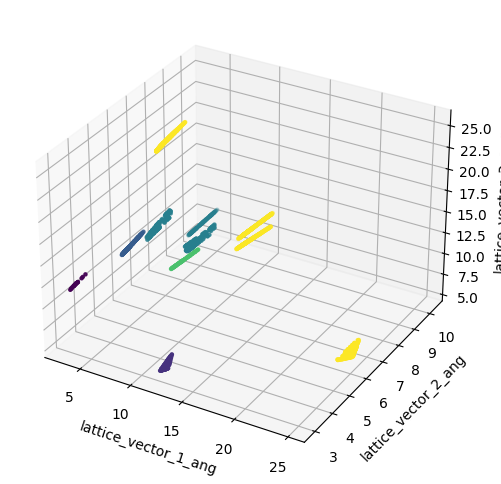

In [159]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lattice_vector_1_ang'], df['lattice_vector_2_ang'], df['lattice_vector_3_ang'], c=df['number_of_total_atoms'], marker='.')
ax.set_xlabel('lattice_vector_1_ang')
ax.set_ylabel('lattice_vector_2_ang')
ax.set_zlabel('lattice_vector_3_ang')
plt.show()

In [160]:
df

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,Eg,Al_atoms,Ga_atoms,In_atoms,sg_12,sg_33,sg_167,sg_194,sg_206,sg_227
0,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,...,3.4387,50.0,30.000,0.000,0,1,0,0,0,0
1,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,...,2.9210,50.0,30.000,0.000,0,0,0,1,0,0
2,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,...,2.7438,32.5,7.500,0.000,0,0,0,0,0,1
3,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,...,3.3492,22.5,0.000,7.500,0,0,1,0,0,0
4,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,...,1.3793,0.0,50.000,30.000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,...,1.4011,0.0,47.504,32.496,1,0,0,0,0,0
596,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,...,0.8068,5.0,0.000,35.000,0,1,0,0,0,0
597,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,...,0.9004,0.0,20.000,60.000,0,0,0,1,0,0
598,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,...,2.2720,25.0,0.000,15.000,0,1,0,0,0,0


In [161]:
corr_list = ['percent_atom_al','percent_atom_ga','percent_atom_in','Eg','Ef']

<Axes: >

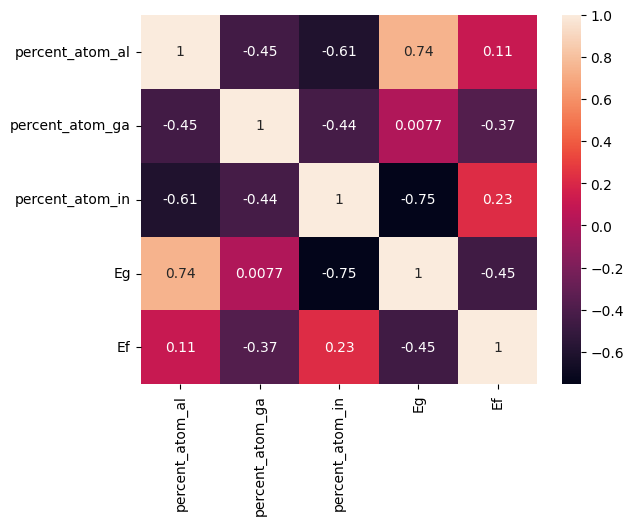

In [162]:
corr = df[corr_list].corr()
#Draw the heatmap using seaborn
sns.heatmap(corr, annot=True)

In [163]:
from sklearn.cluster import KMeans
lattice_vectors = np.array(df[['lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang']])
kmeans = KMeans(n_clusters=10).fit(lattice_vectors)

In [164]:
df['cluster of lattice']=kmeans.labels_

In [165]:
dummy=pd.get_dummies(df['cluster of lattice'],dtype='int')

In [166]:
dummy.columns = ['clusters_of_lattices_'+ str(r) for r in list(dummy.columns.values)]

In [167]:
df = pd.concat([df,dummy],axis=1)

In [168]:
df.columns

Index(['spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'Ef', 'Eg', 'Al_atoms', 'Ga_atoms',
       'In_atoms', 'sg_12', 'sg_33', 'sg_167', 'sg_194', 'sg_206', 'sg_227',
       'cluster of lattice', 'clusters_of_lattices_0',
       'clusters_of_lattices_1', 'clusters_of_lattices_2',
       'clusters_of_lattices_3', 'clusters_of_lattices_4',
       'clusters_of_lattices_5', 'clusters_of_lattices_6',
       'clusters_of_lattices_7', 'clusters_of_lattices_8',
       'clusters_of_lattices_9'],
      dtype='object')

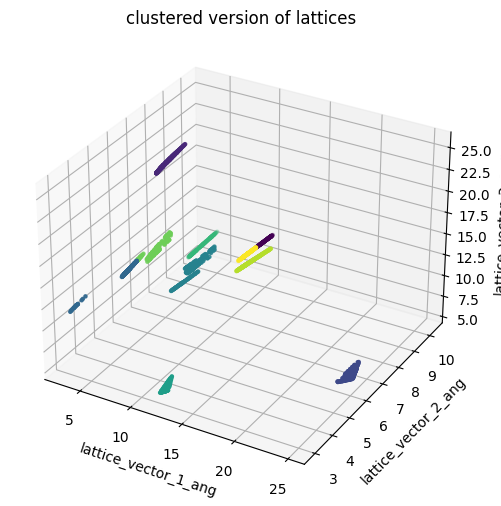

In [169]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lattice_vector_1_ang'], df['lattice_vector_2_ang'], df['lattice_vector_3_ang'], c=df['cluster of lattice'], marker='.',)
ax.set_xlabel('lattice_vector_1_ang')
ax.set_ylabel('lattice_vector_2_ang')
ax.set_zlabel('lattice_vector_3_ang')
plt.title('clustered version of lattices')
plt.show()

<Axes: xlabel='cluster of lattice'>

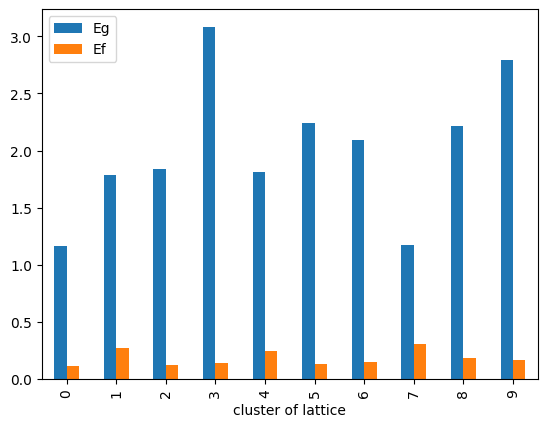

In [170]:
df.groupby('cluster of lattice')[['Eg','Ef']].mean().plot(kind='bar')

<Axes: xlabel='Eg', ylabel='Density'>

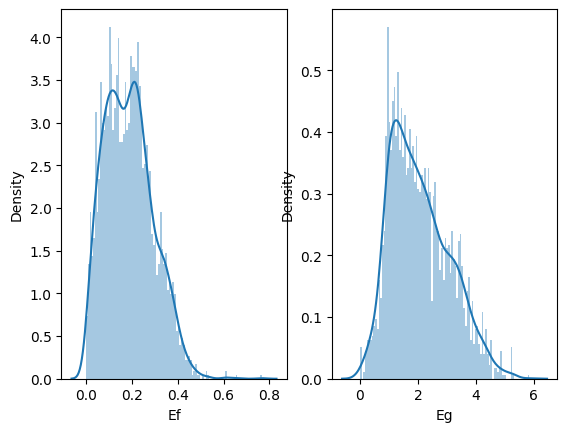

In [171]:
fig,ax=plt.subplots(nrows=1,ncols=2)
sns.distplot(df['Ef'],bins=100,ax=ax[0])
sns.distplot(df['Eg'],bins=100,ax=ax[1])

In [172]:
df['Lattice_side_1']=df.apply(one_to_two,axis=1)
df['Lattice_side_2']=df.apply(one_to_three,axis=1)
df['Lattice_side_3']=df.apply(two_to_three,axis=1)

In [173]:
def area_calculator(x):
    a = x['Lattice_side_1']
    b = x['Lattice_side_2']
    c = x['Lattice_side_3']
    p = (a+b+c)/2
    return np.sqrt(p*(p-a)*(p-b)*(p-c))

In [174]:
df['area'] = df.apply(area_calculator,axis=1)

<Axes: xlabel='number_of_total_atoms'>

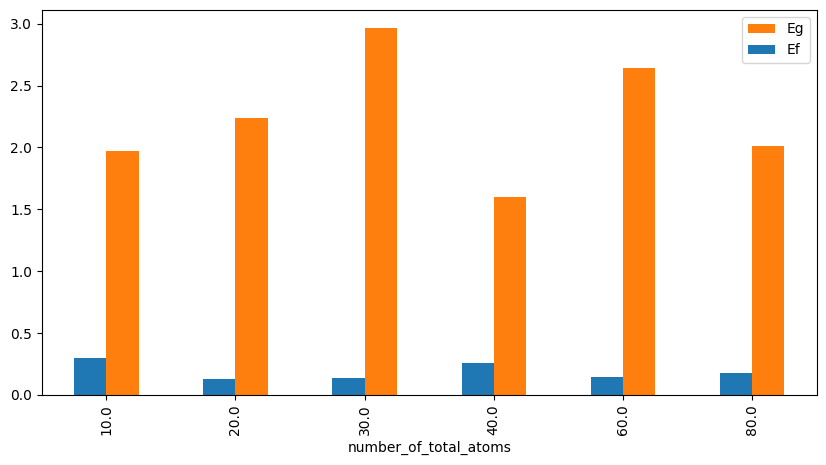

In [175]:
df.groupby('number_of_total_atoms')[['Ef','Eg']].mean().plot(kind='bar',figsize=(10,5),legend='reverse')

In [176]:
dummy_2= pd.get_dummies(df['number_of_total_atoms'],dtype='int')
dummy_2.columns = ['nota_'+ str(x) for x in list(dummy_2.columns.values)]

In [177]:
df = pd.concat([dummy_2,df],axis=1)

In [178]:
df.columns

Index(['nota_10.0', 'nota_20.0', 'nota_30.0', 'nota_40.0', 'nota_60.0',
       'nota_80.0', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'Ef', 'Eg', 'Al_atoms', 'Ga_atoms',
       'In_atoms', 'sg_12', 'sg_33', 'sg_167', 'sg_194', 'sg_206', 'sg_227',
       'cluster of lattice', 'clusters_of_lattices_0',
       'clusters_of_lattices_1', 'clusters_of_lattices_2',
       'clusters_of_lattices_3', 'clusters_of_lattices_4',
       'clusters_of_lattices_5', 'clusters_of_lattices_6',
       'clusters_of_lattices_7', 'clusters_of_lattices_8',
       'clusters_of_lattices_9', 'Lattice_side_1', 'Lattice_side_2',
       'Lattice_side_3', 'area'],
      dtype='object')

In [179]:
df

,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,...,clusters_of_lattices_4,clusters_of_lattices_5,clusters_of_lattices_6,clusters_of_lattices_7,clusters_of_lattices_8,clusters_of_lattices_9,Lattice_side_1,Lattice_side_2,Lattice_side_3,area
0,0,0,0,0,0,1,33,80.0,0.6250,0.3750,...,0,0,0,0,1,0,13.121664,13.538172,12.544256,73.732755
1,0,0,0,0,0,1,194,80.0,0.6250,0.3750,...,0,0,0,0,0,0,10.710964,24.424314,24.426414,127.626563
2,0,0,0,1,0,0,227,40.0,0.8125,0.1875,...,1,0,0,0,0,0,5.659565,17.186719,15.154787,42.049778
3,0,0,1,0,0,0,167,30.0,0.7500,0.0000,...,0,0,0,0,0,0,8.666390,14.428228,14.426266,59.629688
4,0,0,0,0,0,1,194,80.0,0.0000,0.6250,...,0,0,0,0,0,0,11.537088,25.467980,25.467411,143.093313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,12,80.0,0.0000,0.5938,...,0,0,0,0,0,0,25.625649,27.111026,8.973285,114.971825
596,0,0,0,1,0,0,33,40.0,0.1250,0.0000,...,0,0,1,0,0,0,11.003704,11.547172,13.863342,61.596742
597,0,0,0,0,0,1,194,80.0,0.0000,0.2500,...,0,0,0,0,0,0,12.015150,26.005152,26.007260,152.008480
598,0,0,0,1,0,0,33,40.0,0.6250,0.0000,...,0,0,1,0,0,0,10.270355,10.818635,12.991638,53.906623


<Axes: xlabel='area', ylabel='Ef'>

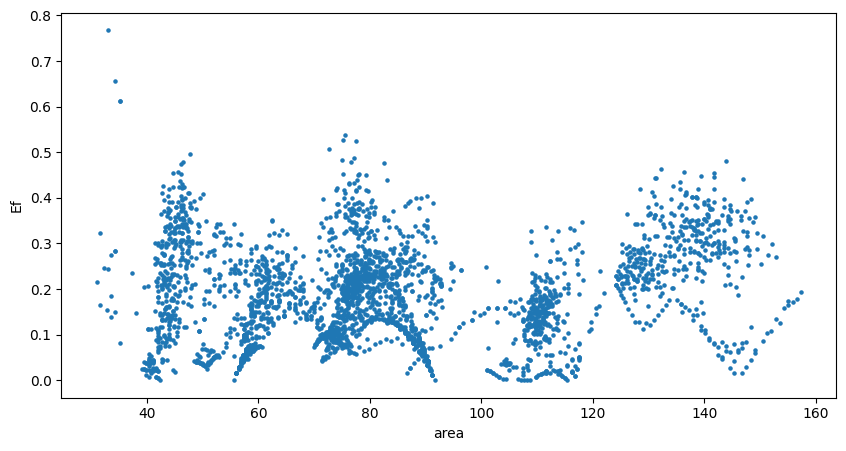

In [180]:
df.plot(kind='scatter',x='area',y='Ef',marker='.',figsize=(10,5))

In [181]:
def area_bucket(x):
    if (x>10) & (x<65):
        return 1
    elif (x>65) & (x<95):
        return 2
    elif (x>95) & (x<120):
        return 3
    else:
        return 4

In [182]:
df['area_bucket']=df['area'].apply(area_bucket)

In [183]:
df

,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,...,clusters_of_lattices_5,clusters_of_lattices_6,clusters_of_lattices_7,clusters_of_lattices_8,clusters_of_lattices_9,Lattice_side_1,Lattice_side_2,Lattice_side_3,area,area_bucket
0,0,0,0,0,0,1,33,80.0,0.6250,0.3750,...,0,0,0,1,0,13.121664,13.538172,12.544256,73.732755,2
1,0,0,0,0,0,1,194,80.0,0.6250,0.3750,...,0,0,0,0,0,10.710964,24.424314,24.426414,127.626563,4
2,0,0,0,1,0,0,227,40.0,0.8125,0.1875,...,0,0,0,0,0,5.659565,17.186719,15.154787,42.049778,1
3,0,0,1,0,0,0,167,30.0,0.7500,0.0000,...,0,0,0,0,0,8.666390,14.428228,14.426266,59.629688,1
4,0,0,0,0,0,1,194,80.0,0.0000,0.6250,...,0,0,0,0,0,11.537088,25.467980,25.467411,143.093313,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,12,80.0,0.0000,0.5938,...,0,0,0,0,0,25.625649,27.111026,8.973285,114.971825,3
596,0,0,0,1,0,0,33,40.0,0.1250,0.0000,...,0,1,0,0,0,11.003704,11.547172,13.863342,61.596742,1
597,0,0,0,0,0,1,194,80.0,0.0000,0.2500,...,0,0,0,0,0,12.015150,26.005152,26.007260,152.008480,4
598,0,0,0,1,0,0,33,40.0,0.6250,0.0000,...,0,1,0,0,0,10.270355,10.818635,12.991638,53.906623,1


Text(0, 0.5, 'Eg')

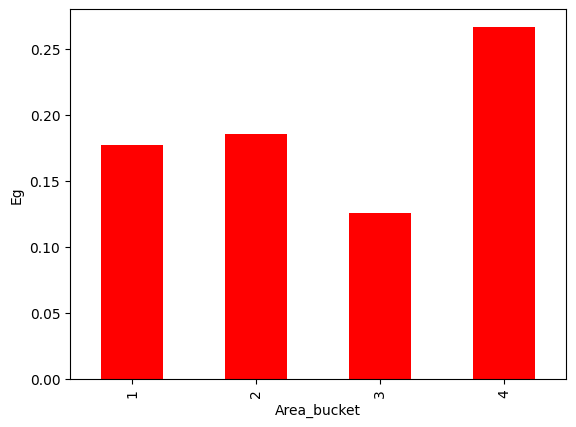

In [184]:
df.groupby('area_bucket')['Ef'].mean().plot(kind='bar',color='r')
plt.xlabel('Area_bucket')
plt.ylabel('Eg')

In [185]:
df['cluster of lattice']

0      8
1      1
2      4
3      3
4      1
      ..
595    2
596    6
597    1
598    6
599    9
Name: cluster of lattice, Length: 3000, dtype: int32

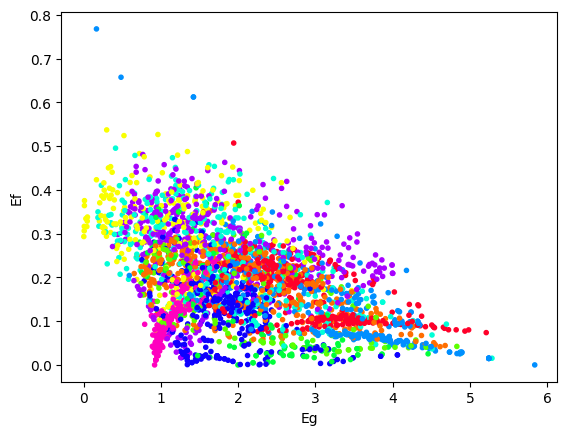

In [186]:
plt.scatter(df['Eg'],df['Ef'],marker='.',cmap='gist_rainbow_r',c=df['cluster of lattice'])
plt.xlabel("Eg")
plt.ylabel("Ef")
plt.show()

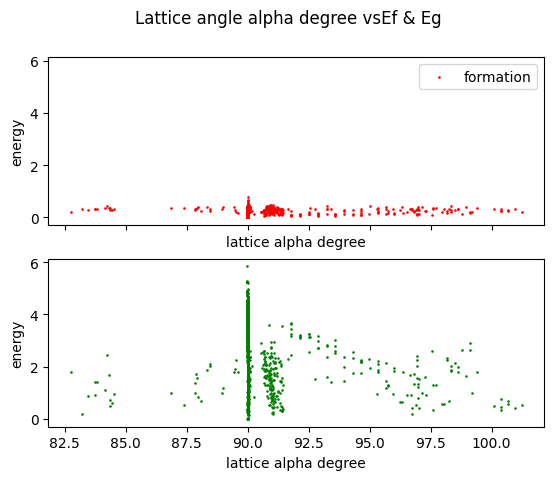

In [187]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['lattice_angle_alpha_degree'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['lattice_angle_alpha_degree'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Lattice angle alpha degree vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('energy')
ax[0].set_xlabel('lattice alpha degree')
ax[1].set_ylabel('energy')
ax[1].set_xlabel('lattice alpha degree')

plt.show()

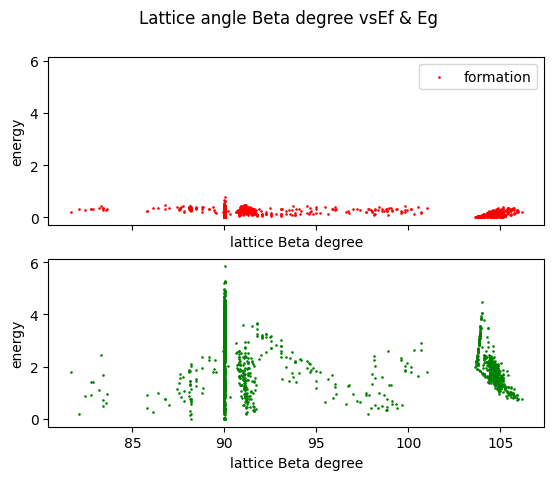

In [188]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['lattice_angle_beta_degree'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['lattice_angle_beta_degree'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Lattice angle Beta degree vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('energy')
ax[0].set_xlabel('lattice Beta degree')
ax[1].set_ylabel('energy')
ax[1].set_xlabel('lattice Beta degree')

plt.show()

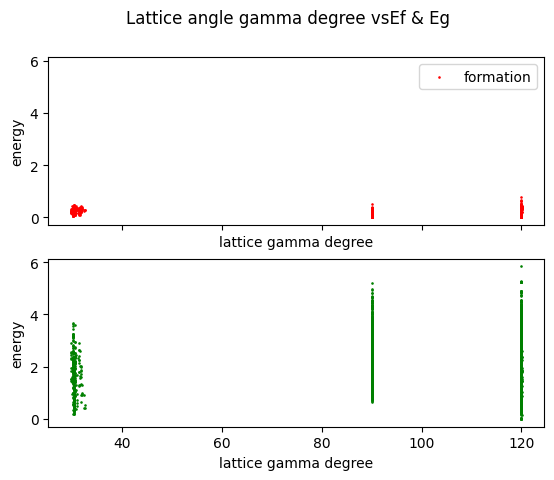

In [189]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['lattice_angle_gamma_degree'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['lattice_angle_gamma_degree'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Lattice angle gamma degree vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('energy')
ax[0].set_xlabel('lattice gamma degree')
ax[1].set_ylabel('energy')
ax[1].set_xlabel('lattice gamma degree')

plt.show()

In [190]:
df['atomic_density'] = df['number_of_total_atoms']/(df['lattice_vector_1_ang']*df['lattice_vector_2_ang']*df['lattice_vector_3_ang'])

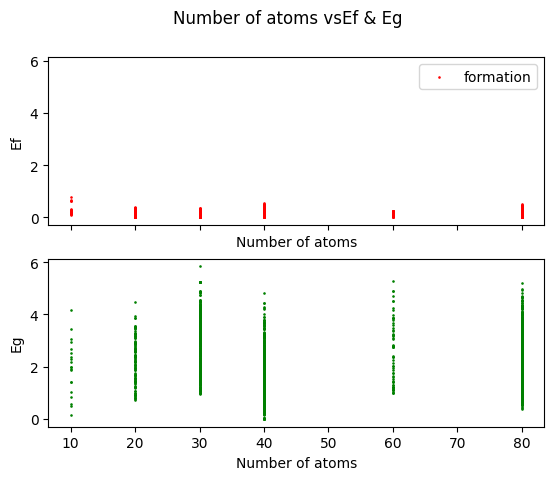

In [191]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['number_of_total_atoms'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['number_of_total_atoms'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('Number of atoms vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Ef')
ax[0].set_xlabel('Number of atoms')
ax[1].set_ylabel('Eg')
ax[1].set_xlabel('Number of atoms')

plt.show()

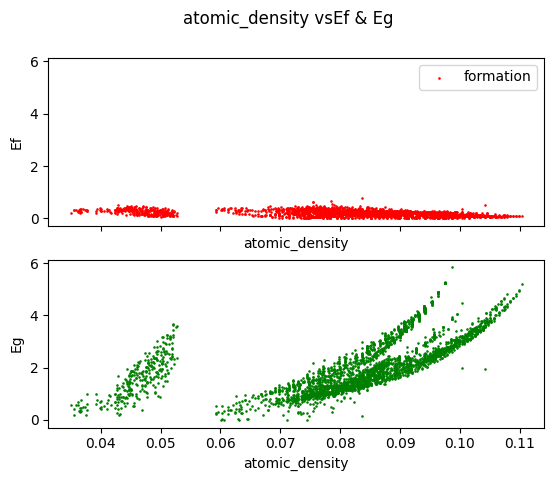

In [192]:
fig, ax = plt.subplots(nrows = 2,ncols=1, sharex=True, sharey=True,)
ax[0].scatter(df['atomic_density'].values, df['Ef'].values,
              color='red', s=3, label='formation',marker='.')
ax[1].scatter(df['atomic_density'].values,df['Eg'].values,
              color='green', s=3, label='bandgap',marker='.')
fig.suptitle('atomic_density vsEf & Eg')
ax[0].legend(loc=0)
ax[0].set_ylabel('Ef')
ax[0].set_xlabel('atomic_density')
ax[1].set_ylabel('Eg')
ax[1].set_xlabel('atomic_density')

plt.show()

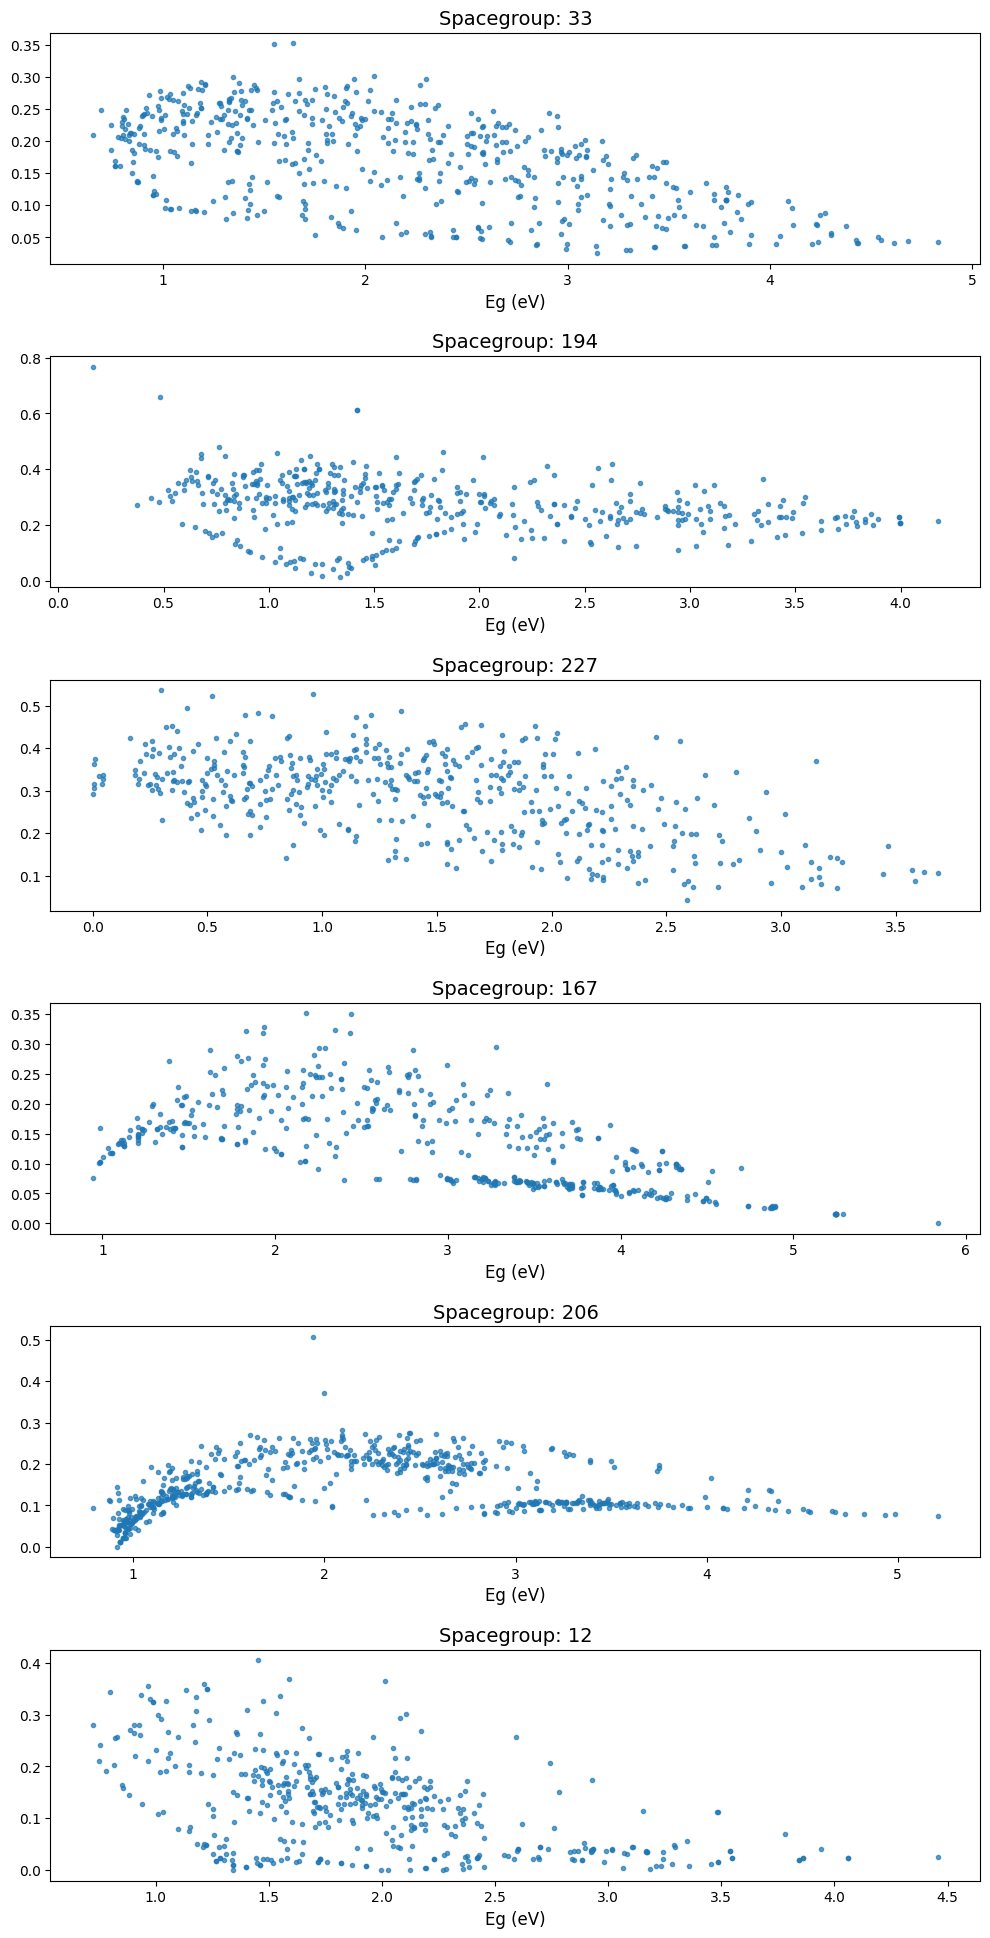

In [193]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 24))
plt.subplots_adjust(hspace=0.4)

for j, spacegroup in enumerate(df['spacegroup'].unique()):
    subset = df[df['spacegroup'] == spacegroup]
    axes[j].scatter(subset['Eg'], subset['Ef'], marker='.', alpha=0.7)
    axes[j].set_xlabel('Eg (eV)', fontsize=12)
    axes[j].set_title(f'Spacegroup: {spacegroup}', fontsize=14)
    axes[j].tick_params(labelsize=10)

In [194]:
df

,nota_10.0,nota_20.0,nota_30.0,nota_40.0,nota_60.0,nota_80.0,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,...,clusters_of_lattices_6,clusters_of_lattices_7,clusters_of_lattices_8,clusters_of_lattices_9,Lattice_side_1,Lattice_side_2,Lattice_side_3,area,area_bucket,atomic_density
0,0,0,0,0,0,1,33,80.0,0.6250,0.3750,...,0,0,1,0,13.121664,13.538172,12.544256,73.732755,2,0.102426
1,0,0,0,0,0,1,194,80.0,0.6250,0.3750,...,0,0,0,0,10.710964,24.424314,24.426414,127.626563,4,0.088537
2,0,0,0,1,0,0,227,40.0,0.8125,0.1875,...,0,0,0,0,5.659565,17.186719,15.154787,42.049778,1,0.051910
3,0,0,1,0,0,0,167,30.0,0.7500,0.0000,...,0,0,0,0,8.666390,14.428228,14.426266,59.629688,1,0.088556
4,0,0,0,0,0,1,194,80.0,0.0000,0.6250,...,0,0,0,0,11.537088,25.467980,25.467411,143.093313,4,0.073344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,12,80.0,0.0000,0.5938,...,0,0,0,0,25.625649,27.111026,8.973285,114.971825,3,0.080089
596,0,0,0,1,0,0,33,40.0,0.1250,0.0000,...,1,0,0,0,11.003704,11.547172,13.863342,61.596742,1,0.074773
597,0,0,0,0,0,1,194,80.0,0.0000,0.2500,...,0,0,0,0,12.015150,26.005152,26.007260,152.008480,4,0.066319
598,0,0,0,1,0,0,33,40.0,0.6250,0.0000,...,1,0,0,0,10.270355,10.818635,12.991638,53.906623,1,0.091652


In [195]:
del df['spacegroup'],df['number_of_total_atoms']

In [196]:
y_Eg=df['Eg']
y_Ef=df['Ef']

In [197]:
del df['Eg'],df['Ef']

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 599
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nota_10.0                   3000 non-null   int64  
 1   nota_20.0                   3000 non-null   int64  
 2   nota_30.0                   3000 non-null   int64  
 3   nota_40.0                   3000 non-null   int64  
 4   nota_60.0                   3000 non-null   int64  
 5   nota_80.0                   3000 non-null   int64  
 6   percent_atom_al             3000 non-null   float64
 7   percent_atom_ga             3000 non-null   float64
 8   percent_atom_in             3000 non-null   float64
 9   lattice_vector_1_ang        3000 non-null   float64
 10  lattice_vector_2_ang        3000 non-null   float64
 11  lattice_vector_3_ang        3000 non-null   float64
 12  lattice_angle_alpha_degree  3000 non-null   float64
 13  lattice_angle_beta_degree   3000 non-nu

## **PREDICTION MODEL FOR Ef (Formation Energy (eV))**

SVR(Support Vector Regression) Model with 10-fold Cross Validation , on test data -10% of original Dataset

In [199]:
X=df

In [200]:
y=y_Ef

In [201]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_pred)-np.log1p(y_true), 2)))


In [202]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline




In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the RMSLE function

# Create a scorer using the RMSLE function
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [204]:

# Create a pipeline with StandardScaler and SVR
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])




In [205]:
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5, 1],
    'svr__gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=10, scoring=rmsle_scorer, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation RMSLE:", -grid_search.best_score_)


Best parameters: {'svr__C': 1, 'svr__epsilon': 0.01, 'svr__gamma': 'auto'}
Best cross-validation RMSLE: 0.03460487277532529


In [206]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSLE on the test set
test_rmsle = rmsle(y_test, y_pred)

In [207]:
import joblib

In [208]:
test_rmsle

0.032340183667741974

In [209]:
model =grid_search.best_estimator_
joblib.dump(model, 'model_Ef_TCO.pkl')

['model_Ef_TCO.pkl']

## **PREDICTION MODEL FOR Eg (Band Gap Energy (eV))**

SVR(Support Vector Regression) Model with 10-fold Cross Validation , on test data -10% of original Dataset

In [210]:
y=y_Eg

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the RMSLE function

# Create a scorer using the RMSLE function
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [212]:
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])



In [213]:
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5, 1],
    'svr__gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=10, scoring=rmsle_scorer, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation RMSLE:", -grid_search.best_score_)


Best parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
Best cross-validation RMSLE: 0.08973946153013722


In [214]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSLE on the test set
test_rmsle = rmsle(y_test, y_pred)

In [215]:
test_rmsle

0.08669213908740012

In [216]:
model =grid_search.best_estimator_
joblib.dump(model, 'model_Eg_TCO.pkl')

['model_Eg_TCO.pkl']